<a href="https://colab.research.google.com/github/shiv-source/Cat-vs-Dog-Classifier-DNN/blob/master/Cat_vs_Dog_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import tensorflow as tf
import keras 
import numpy as np 
import os
import matplotlib.pyplot as plt


In [0]:
# Training Directory of cats and Dogs.
train_cat_dir = os.path.join('/content/drive/My Drive/cats_and_dogs_filtered/train/cats')
train_dog_dir = os.path.join('/content/drive/My Drive/cats_and_dogs_filtered/train/dogs')

In [0]:
# Validation Directory of cats and Dogs

validation_cat_dir = os.path.join('/content/drive/My Drive/cats_and_dogs_filtered/validation/cats')
validation_dog_dir =os.path.join('/content/drive/My Drive/cats_and_dogs_filtered/validation/dogs')

In [43]:
#Get the name of the file in the each dir.
# Training
train_cat_names = os.listdir(train_cat_dir)
print(train_cat_names[:10])

train_dog_names = os.listdir(train_dog_dir)
print(train_dog_names[:10])

['cat.0.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1.jpg', 'cat.104.jpg', 'cat.101.jpg', 'cat.105.jpg', 'cat.106.jpg', 'cat.103.jpg', 'cat.102.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.103.jpg', 'dog.102.jpg', 'dog.106.jpg', 'dog.105.jpg', 'dog.104.jpg']


In [44]:
# For Validation.
validation_cat_names = os.listdir(validation_cat_dir)
print(validation_cat_names[:10])

validation_dog_names= os.listdir(validation_cat_dir)
print(validation_dog_names[:10])

['cat.2000.jpg', 'cat.2003.jpg', 'cat.2001.jpg', 'cat.2002.jpg', 'cat.2006.jpg', 'cat.2005.jpg', 'cat.2008.jpg', 'cat.2009.jpg', 'cat.2004.jpg', 'cat.2007.jpg']
['cat.2000.jpg', 'cat.2003.jpg', 'cat.2001.jpg', 'cat.2002.jpg', 'cat.2006.jpg', 'cat.2005.jpg', 'cat.2008.jpg', 'cat.2009.jpg', 'cat.2004.jpg', 'cat.2007.jpg']


In [45]:
# Print out the total data in each of the dir.
# For trainning

print('No of cat images in the trainning set :', len(os.listdir(train_cat_dir)) )
print('No of dog images in the trainning set :', len(os.listdir(train_dog_dir)) )

print('Total images in the Test set :', (len(os.listdir(train_cat_dir))+len(os.listdir(train_dog_dir)) ))

No of cat images in the trainning set : 1000
No of dog images in the trainning set : 1000
Total images in the Test set : 2000


In [46]:
# For validation.
print('No of cat images in the validation set :', len(os.listdir(validation_cat_dir)) )
print('No of dog images in the validation set :', len(os.listdir(validation_dog_dir)) )

print('Total images in the validation set :', (len(os.listdir(validation_cat_dir))+len(os.listdir(validation_dog_dir)) ))


No of cat images in the validation set : 500
No of dog images in the validation set : 500
Total images in the validation set : 1000


In [0]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

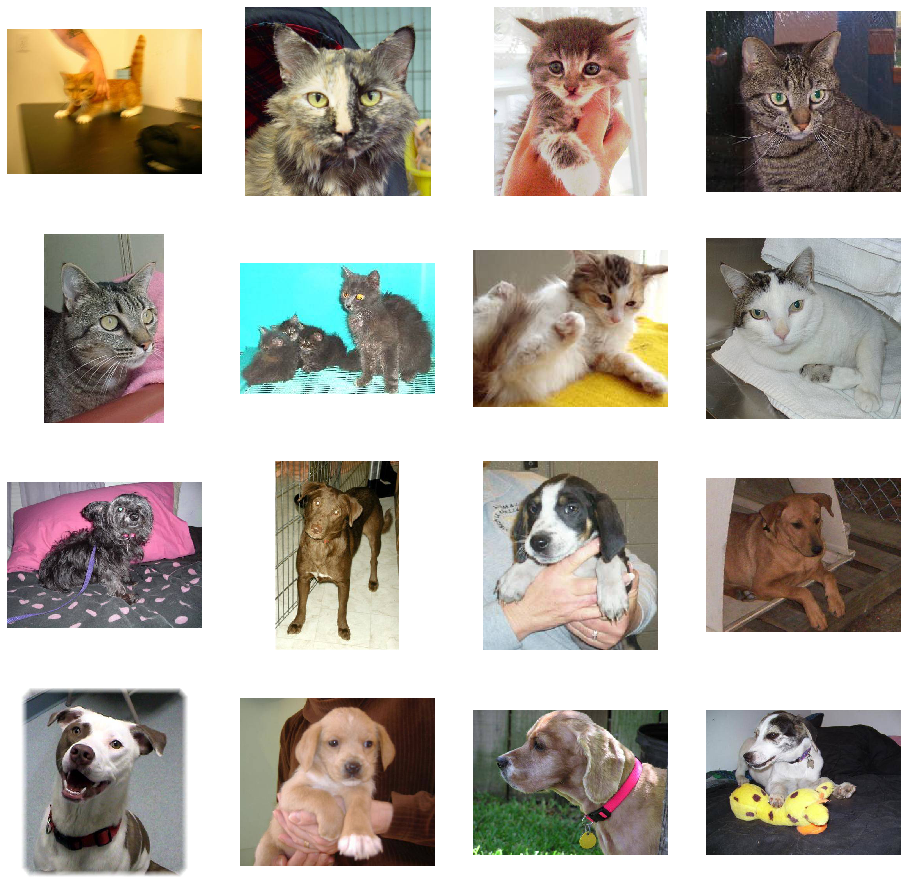

In [48]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(train_cat_dir, fname) 
                for fname in train_cat_names[ pic_index-8:pic_index] 
               ]

next_dog_pix = [os.path.join(train_dog_dir, fname) 
                for fname in train_dog_names[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# Creating the Deep Nural Network Model.


In [0]:
model = tf.keras.models.Sequential([
                                    #first layer
                                    tf.keras.layers.Conv2D(16,(3,3),activation='relu', input_shape=(150,150,3)),
                                    tf.keras.layers.MaxPool2D(2,2),

                                    #second layer
                                    tf.keras.layers.Conv2D(16,(3,3),activation='relu',),
                                    tf.keras.layers.MaxPool2D(2,2),

                                    #third layer
                                    tf.keras.layers.Conv2D(16,(3,3),activation='relu',),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    
                                    #fourth layer
                                    tf.keras.layers.Conv2D(16,(3,3),activation='relu',),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    
                                    #fifth layer
                                    tf.keras.layers.Conv2D(16,(3,3),activation='relu',),
                                    tf.keras.layers.MaxPool2D(2,2),

                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(1, activation='sigmoid')
                                    
                                    
                         
])

In [50]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 72, 72, 16)        2320      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 36, 36, 16)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 34, 34, 16)        2320      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 17, 17, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 15, 15, 16)       

In [0]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics = ['acc'])

In [55]:
history = model.fit_generator(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=100,
                              epochs=15,
                              validation_steps=50,
                              verbose=2)

Epoch 1/15
Epoch 1/15
100/100 - 13s - loss: 0.6486 - acc: 0.6230 - val_loss: 0.6341 - val_acc: 0.6480
Epoch 2/15
Epoch 1/15
100/100 - 12s - loss: 0.6166 - acc: 0.6485 - val_loss: 0.6271 - val_acc: 0.6530
Epoch 3/15
Epoch 1/15
100/100 - 12s - loss: 0.5830 - acc: 0.6945 - val_loss: 0.7304 - val_acc: 0.5870
Epoch 4/15
Epoch 1/15
100/100 - 12s - loss: 0.5670 - acc: 0.6970 - val_loss: 0.5823 - val_acc: 0.6770
Epoch 5/15
Epoch 1/15
100/100 - 12s - loss: 0.5442 - acc: 0.7160 - val_loss: 0.6164 - val_acc: 0.6480
Epoch 6/15
Epoch 1/15
100/100 - 12s - loss: 0.5397 - acc: 0.7295 - val_loss: 0.5965 - val_acc: 0.6730
Epoch 7/15
Epoch 1/15
100/100 - 12s - loss: 0.5309 - acc: 0.7345 - val_loss: 0.6556 - val_acc: 0.6440
Epoch 8/15
Epoch 1/15
100/100 - 12s - loss: 0.4982 - acc: 0.7605 - val_loss: 0.6021 - val_acc: 0.6750
Epoch 9/15
Epoch 1/15
100/100 - 12s - loss: 0.4839 - acc: 0.7620 - val_loss: 0.6360 - val_acc: 0.6690
Epoch 10/15
Epoch 1/15
100/100 - 12s - loss: 0.4648 - acc: 0.7780 - val_loss: 0.66

#Preprocessing of Data

In [52]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_dir=os.path.join('/content/drive/My Drive/cats_and_dogs_filtered/train')
validation_dir=os.path.join('/content/drive/My Drive/cats_and_dogs_filtered/validation')


# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


#Model Evaluation 

Text(0.5, 1.0, 'Training and validation loss')

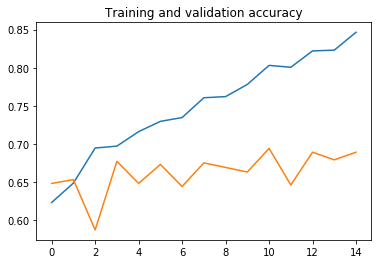

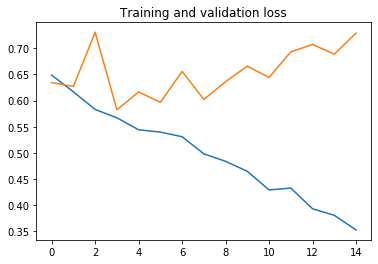

In [56]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'acc' ]
val_acc  = history.history[ 'val_acc' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

#For running the model

In [60]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0:
    print(fn + " is a dog")
    
  else:
    print(fn + " is a cat")
 

Saving Cat03.jpg to Cat03.jpg
Saving download (2).jfif to download (2) (1).jfif
[1.]
Cat03.jpg is a dog
[1.]
download (2).jfif is a dog
